In [2]:
import numpy as np 
import sympy as sp 
import matplotlib.pyplot as plt

P2.3

In [3]:
omega0 = 6*10**15 
gamma = omega0 / 5
N = 10**28
E0 = 10**4
qe = 1.6*10**(-19)
me = 9.11*10**(-31)
e0 = 8.85*10**(-12)
c = 2.998*10**8
i = 1j

a.)

In [4]:
# i.)
demnom = omega0*gamma*(4 - i) - 2*gamma**2*(2 - i)
coef = qe / me
re_coef = coef / demnom
ampl = np.abs(re_coef)
phase = np.angle(re_coef)
print(f"Amplitude: {ampl:.2e}, Phase: {phase:.2f} radians")

Amplitude: 7.49e-21, Phase: 0.19 radians


In [5]:
# ii.) 
demnom = -i*omega0*gamma
coef = qe / me
re_coef = coef / demnom
ampl = np.abs(re_coef)
phase = np.angle(re_coef)
print(f"Amplitude: {ampl:.2e}, Phase: {phase:.2f} radians")

Amplitude: 2.44e-20, Phase: 1.57 radians


In [6]:
# iii.) 
demnom = -i*gamma*omega0 - 2*i*gamma**2 -4*gamma*omega0 - 4*gamma**2
coef = qe / me
re_coef = coef / demnom
ampl = np.abs(re_coef)
phase = np.angle(re_coef)
print(f"Amplitude: {ampl:.2e}, Phase: {phase:.2f} radians")

Amplitude: 4.88e-21, Phase: 2.86 radians


b.) No, the susceptibility does not depend on the electric field because it is defined as the ratio between the electric field and polarization. 

In [7]:
omegap = np.sqrt( (N*qe**2) / (me*e0) )
omega1 = omega0 - 2*gamma
omega2 = omega0
omega3 = omega0 + 2*gamma

In [8]:
# i.) 
X1 = (omegap**2) / (omega0**2 - i*gamma*omega1 - omega1**2)
print(f"X1: {X1:.2e}")


X1: 1.33e+00+2.50e-01j


In [9]:
# ii.)
X2 = (omegap**2) / (omega0**2 - i*gamma*omega2 - omega2**2)
print(f"X2: {X2:.2e}")

X2: -0.00e+00+4.41e+00j


In [10]:
# iii.)
X3 = (omegap**2) / (omega0**2 - i*gamma*omega3 - omega3**2)
print(f"X3: {X3:.2e}")

X3: -8.47e-01+2.47e-01j


c.)

In [11]:
# i.)
n1 = np.sqrt( ((1 + np.real(X1)) + np.sqrt( (1 + np.real(X1))**2 + np.imag(X1)**2 )) / 2 )
k1 = np.imag(X1) / (2*n1)
print(f"n: {n1:.2f}, k: {k1:.2f}")

n: 1.53, k: 0.08


In [12]:
# ii.)
n2 = np.sqrt( ((1 + np.real(X2)) + np.sqrt( (1 + np.real(X2))**2 + np.imag(X2)**2 )) / 2 )
k2 = np.imag(X2) / (2*n2)
print(f"n: {n2:.2f}, k: {k2:.2f}")

n: 1.66, k: 1.33


In [13]:
# iii.)
n3 = np.sqrt( ((1 + np.real(X3)) + np.sqrt( (1 + np.real(X3))**2 + np.imag(X3)**2 )) / 2 )
k3 = np.imag(X3) / (2*n3)
print(f"n: {n3:.2f}, k: {k3:.2f}")

n: 0.47, k: 0.26


d.)

In [14]:
# i.) 
speed = 1 / (abs(n1 + i*k1)) # in terms of c
skinDepth = c / (omega1 * k1)
print(f"Speed of light at omega1: {speed:.2f} c")
print(f"Skin depth at omega1: {skinDepth:.2e} m")

Speed of light at omega1: 0.65 c
Skin depth at omega1: 1.02e-06 m


In [15]:
# ii.) 
speed = 1 / (abs(n2 + i*k2)) # in terms of c
skinDepth = c / (omega2 * k2)
print(f"Speed of light at omega1: {speed:.2f} c")
print(f"Skin depth at omega1: {skinDepth:.2e} m")

Speed of light at omega1: 0.47 c
Skin depth at omega1: 3.77e-08 m


In [16]:
# iii.) 
speed = 1 / (abs(n3 + i*k3)) # in terms of c
skinDepth = c / (omega3 * k3)
print(f"Speed of light at omega3: {speed:.2f} c")
print(f"Skin depth at omega3: {skinDepth:.2e} m")

Speed of light at omega3: 1.85 c
Skin depth at omega3: 1.36e-07 m


P2.4

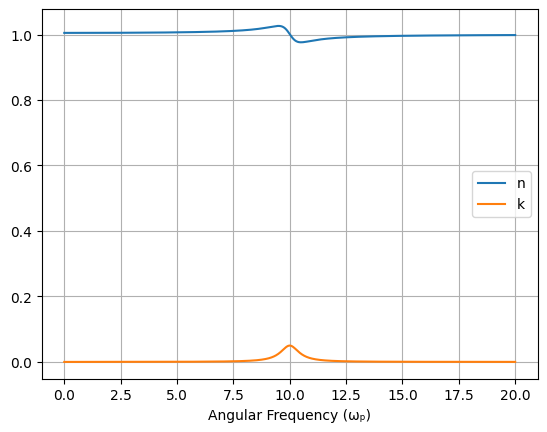

In [17]:
# a.)
# plot n and k as function of omega, x axis units of omegap
omega = np.linspace(0, 20, 1000)
omegap = 1
omega0 = 10 * omegap
gamma = omegap
X = (omegap**2) / (omega0**2 - i*gamma*omega - omega**2)
n = np.sqrt( ((1 + np.real(X)) + np.sqrt( (1 + np.real(X))**2 + np.imag(X)**2 )) / 2 )
k = np.imag(X) / (2*n)
plt.plot(omega, n, label='n')
plt.plot(omega, k, label='k')
plt.xlabel('Angular Frequency (ωₚ)')
plt.legend()
plt.grid()
plt.show()

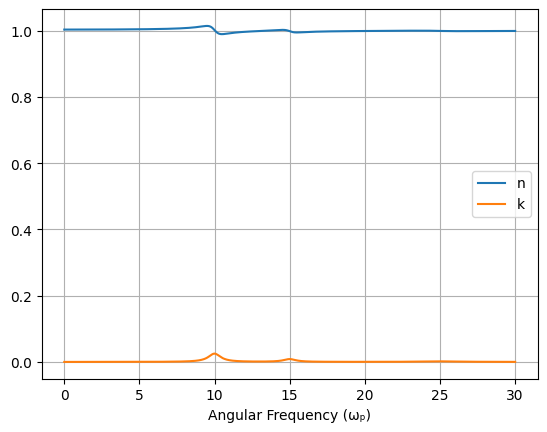

In [18]:
# b.)
omega = np.linspace(0, 30, 1000)
omegap = 1
omega0 = [10, 15, 25]
gamma = [omegap, omegap, 3 * omegap]
f = [0.5, 0.25, 0.25]
chiTotal = 0
epsilon = 0
for j in range(len(omega0)):
    X = (f[j] * omegap**2) / (omega0[j]**2 - i*gamma[j]*omega - omega**2)
    chiTotal += X

epsilon = 1 + chiTotal
n = np.real(np.sqrt(epsilon))
k = np.imag(np.sqrt(epsilon))
plt.plot(omega, n, label=f'n')
plt.plot(omega, k, label=f'k')
plt.xlabel('Angular Frequency (ωₚ)')
plt.legend()
plt.grid()
plt.show()


P2.8

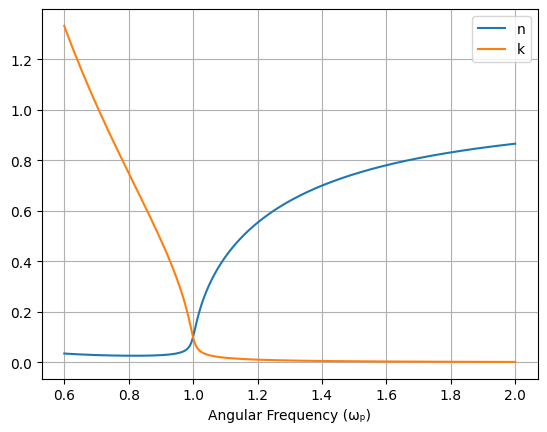

In [19]:
# Plot n and k as a function of frequency for a conductor
omegap = 1
gamma = 0.02 * omegap
omega = np.linspace(0.6 * omegap, 2 * omegap, 1000)
# epsilon = (n + ik)^2
epsilon = 1 - (omegap**2) / (omega**2 + i*gamma*omega)
n = np.real(np.sqrt(epsilon))
k = np.imag(np.sqrt(epsilon))
plt.plot(omega, n, label='n')
plt.plot(omega, k, label='k')
plt.xlabel('Angular Frequency (ωₚ)')
plt.legend()
plt.grid()
plt.show()

P2.10

In [20]:
# a.) Find intensity (W / cm^2)
dt = 2.5 * 10**(-14)
E = 100e-3 # J
r = 5e-4 # cm 
A = np.pi * r**2# cm^2
I = E / (A * dt) # W / cm^2
print(f"Intensity: {I:.2e} W/cm^2")

Intensity: 5.09e+18 W/cm^2


In [21]:
# b.) Peak electric field (V / angstrom)
n = 1 
epsilon0 = 8.85*10**(-12) # F/m
c = 2.998*10**8 # m/s
E0 = np.sqrt(2 * I*(1e2)**2 / (n * epsilon0 * c)) # V/m
E0_angstrom = E0 * 1e-10 # V/angstrom
print(f"Peak electric field: {E0_angstrom:.2f} V/angstrom")

Peak electric field: 619.60 V/angstrom


In [22]:
# c.) Peak Magenetic field (T)
# c = omega / k
# B0 = k * E0 / omega
B = E0 / c  # T
print(f"Peak magnetic field: {B:.2e} T")

Peak magnetic field: 2.07e+04 T


P2.11

In [27]:
# a.) intensity (W / cm^2) on the retina looking at the sun
r = 1e-3 # m radius of pupil
Apupil = np.pi * r**2 # m^2
S = 1.1e3 # W / m^2, irradiance of sun on Earth surface
n = 1
d0 = 1.5e11 # m, distance from sun to Earth
di = 22e-3 # m, distance from eye to retina
radSun = 7.0e8 # m, radius of the sun
rimage = radSun * (di / d0) # m, radius of image on retina
Aimage = np.pi * rimage**2 # m^2, area of image on retina
Pin = S * Apupil # W, power of sunlight entering the eye
I = Pin / Aimage # W / m^2, intensity on retina
I = I / (1e2)**2 # W / cm^2
print(f"Intensity on retina: {I:.2f} W/cm^2")

Intensity on retina: 10.44 W/cm^2


In [29]:
# b.) intensity (W / cm^2) on the retina looking at a 1 mW HeNe laser
rLas = 0.5e-3 # m, radius of laser
Alas = np.pi * rLas**2 # m^2, area of laser spot
d0 = 2 # m
rimage = rLas * (di / d0) # m, radius of image on retina
Aimage = np.pi * rimage**2 # m^2, area of image on retina
P = 1e-3 # W, power of laser
I = P / Aimage # W / m^2, intensity on retina
I = I / (1e2)**2 # W / cm^2
print(f"Intensity on retina: {I:.2f} W/cm^2")

Intensity on retina: 1052.26 W/cm^2
